In [335]:
import pandas as pd,joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV,cross_val_score

In [333]:
#importing data 
df=pd.read_csv("Covid_19new.csv")
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [249]:
#describing info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

Observation:There are 10 float, 4 int, 4 object 

In [250]:
df.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [251]:
#checking shape
df.shape

(58, 18)

In [252]:
#checking null values
df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

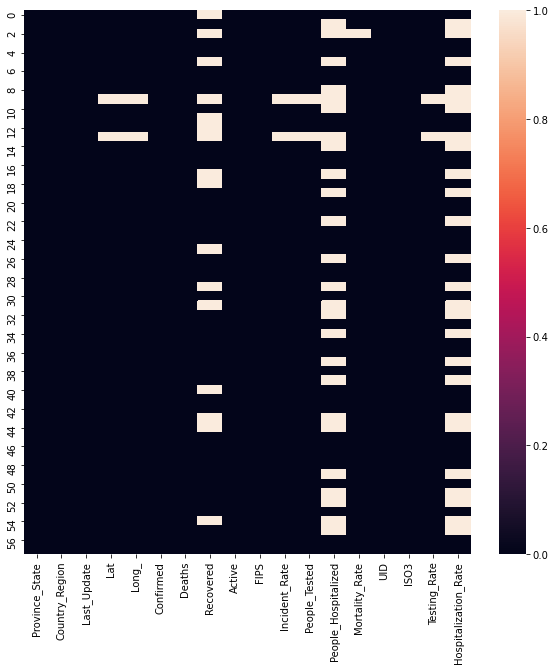

In [253]:
#null values in visual formate
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())

Observation: As we can see there null values present in recovered People hospitalized Lat long ,hospitalization rate, testing _rate,mortality_rate,people_tested, incident_rate

In [254]:
df.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,56.000000,56.000000,58.000000,58.000000,42.000000,58.000000,58.000000,56.000000,5.600000e+01,33.000000,57.000000,5.800000e+01,56.000000,33.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3894.186870,14.342541
std,10.887035,49.754449,52562.031122,4084.750891,11674.490020,41294.705318,17408.350591,402.682539,2.987834e+05,13185.628145,2.135002,2.378302e+07,1933.169297,5.047403
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043
25%,34.594600,-101.165775,2596.000000,74.000000,970.000000,812.500000,18.250000,148.521021,4.608100e+04,535.000000,3.072626,8.400001e+07,2712.800274,10.000000
50%,39.061850,-87.944200,10148.500000,385.000000,3008.000000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,4.403318,8.400003e+07,3469.782532,13.598326
75%,42.361650,-76.970625,29395.500000,1394.250000,7326.750000,19291.250000,47.750000,477.888542,2.796948e+05,4389.000000,5.466238,8.400004e+07,4763.649736,17.658649
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438


Observation: 1)In Lat there is huge difference in max and min,standard deviation is quit high
2)In Long_ mean is negative std is very high huge difference in max and min
3)Deaths std is high 
4)

In [255]:
#handeling the null values
df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [256]:
#filling the null values.
si=SimpleImputer(strategy="mean")
df["Lat"]=si.fit_transform(df["Lat"].values.reshape(-1,1))
df["Long_"]=si.fit_transform(df["Long_"].values.reshape(-1,1))
df["Recovered"]=si.fit_transform(df["Recovered"].values.reshape(-1,1))
df["Incident_Rate"]=si.fit_transform(df["Incident_Rate"].values.reshape(-1,1))
df["People_Tested"]=si.fit_transform(df["People_Tested"].values.reshape(-1,1))
df["People_Hospitalized"]=si.fit_transform(df["People_Hospitalized"].values.reshape(-1,1))
df["Mortality_Rate"]=si.fit_transform(df["Mortality_Rate"].values.reshape(-1,1))
df["Hospitalization_Rate"]=si.fit_transform(df["Hospitalization_Rate"].values.reshape(-1,1))
df["Testing_Rate"]=si.fit_transform(df["Testing_Rate"].values.reshape(-1,1))
    

In [257]:
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,7007.428571,12530.0,1,266.194321,164450.0,1493.000000,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.000000,39.0,2,54.815493,37045.0,4897.454545,2.493766,84000002,USA,5063.940017,14.342541
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,7007.428571,0.0,60,0.000000,124.0,4897.454545,4.458248,16,ASM,222.857246,14.342541
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.000000,10386.0,4,204.788838,165435.0,1792.000000,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.000000,1044.0,5,165.782801,96258.0,535.000000,2.138717,84000005,USA,3189.670370,10.693584


In [258]:
df.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

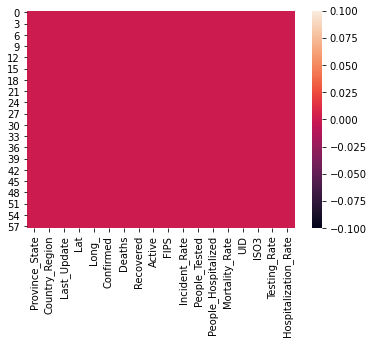

In [259]:
# checking null with visuals.
sns.heatmap(df.isnull())

Observation no null values are present

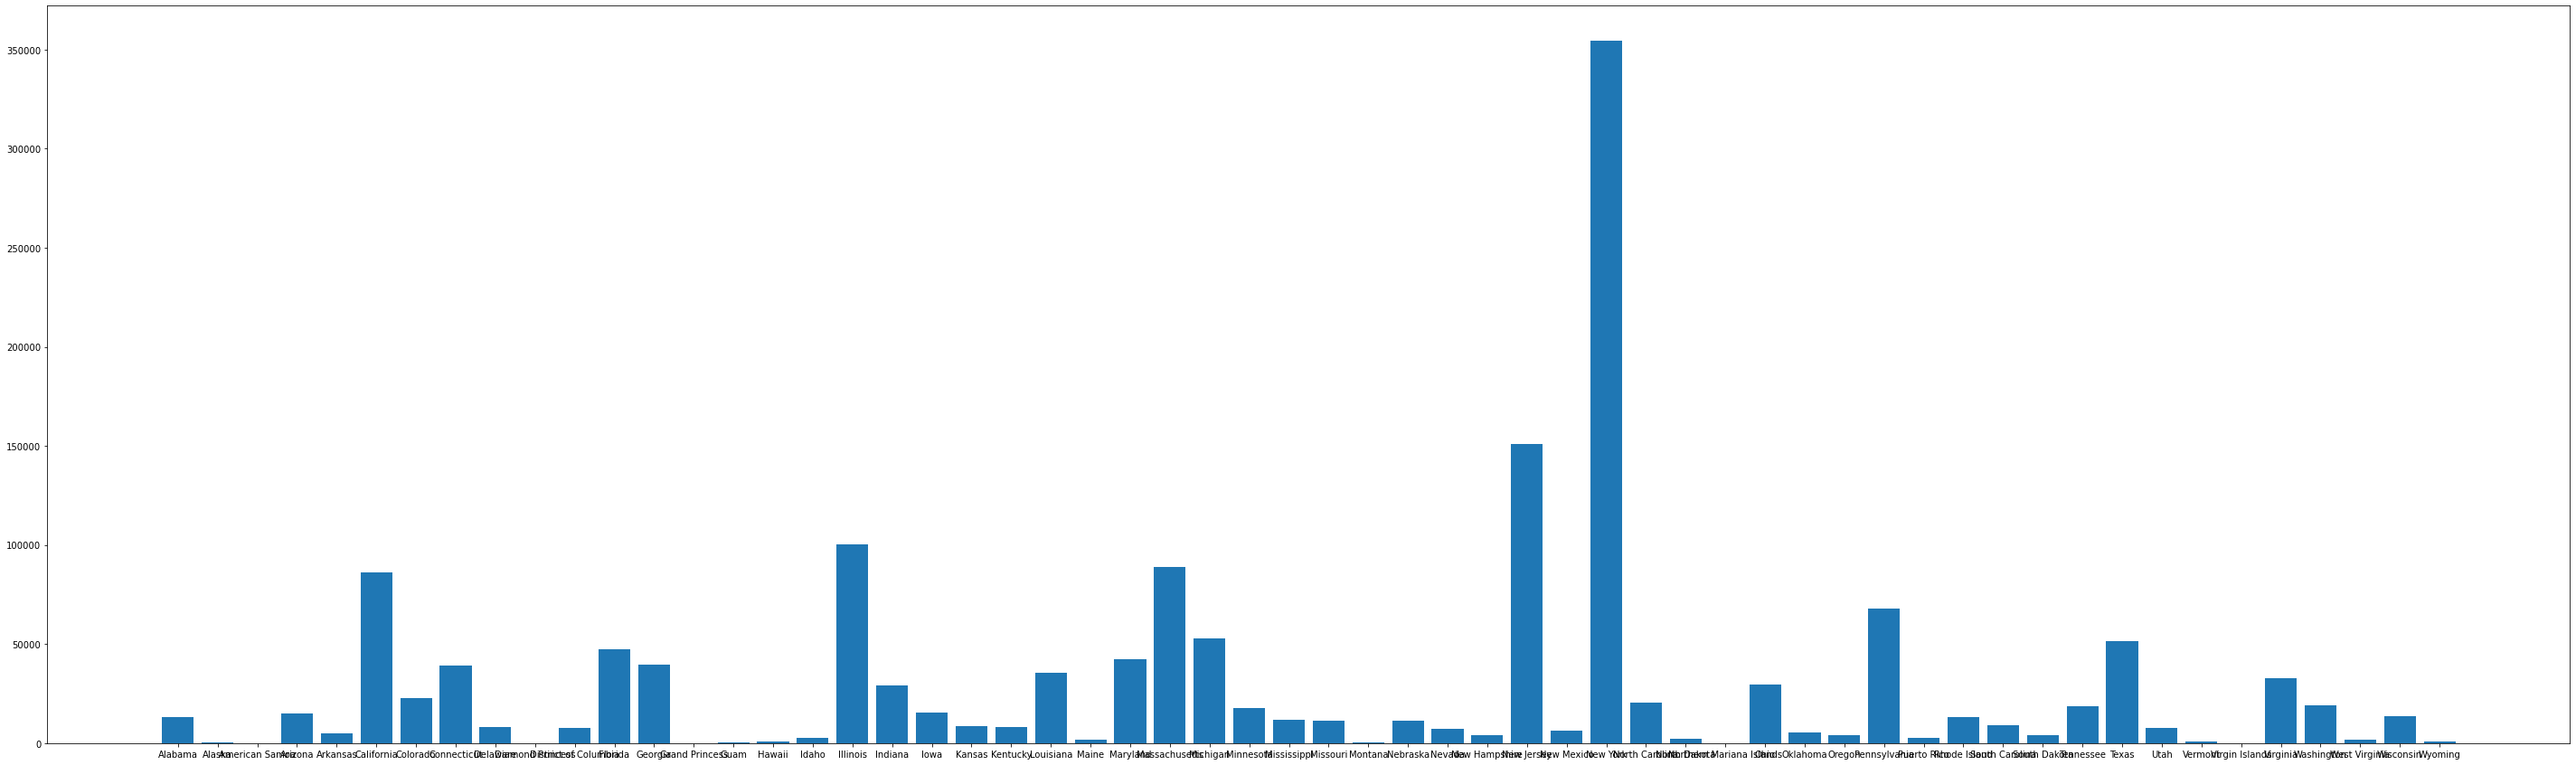

In [359]:
plt.figure(figsize=(50,15))
x=df["Province_State"]
y=df["Confirmed"]
plt.bar(x,y)
xlabel='States'
ylabel='Confirmed'
plt.show()

Observation:Most number of confirmed cases are found in Newyork 

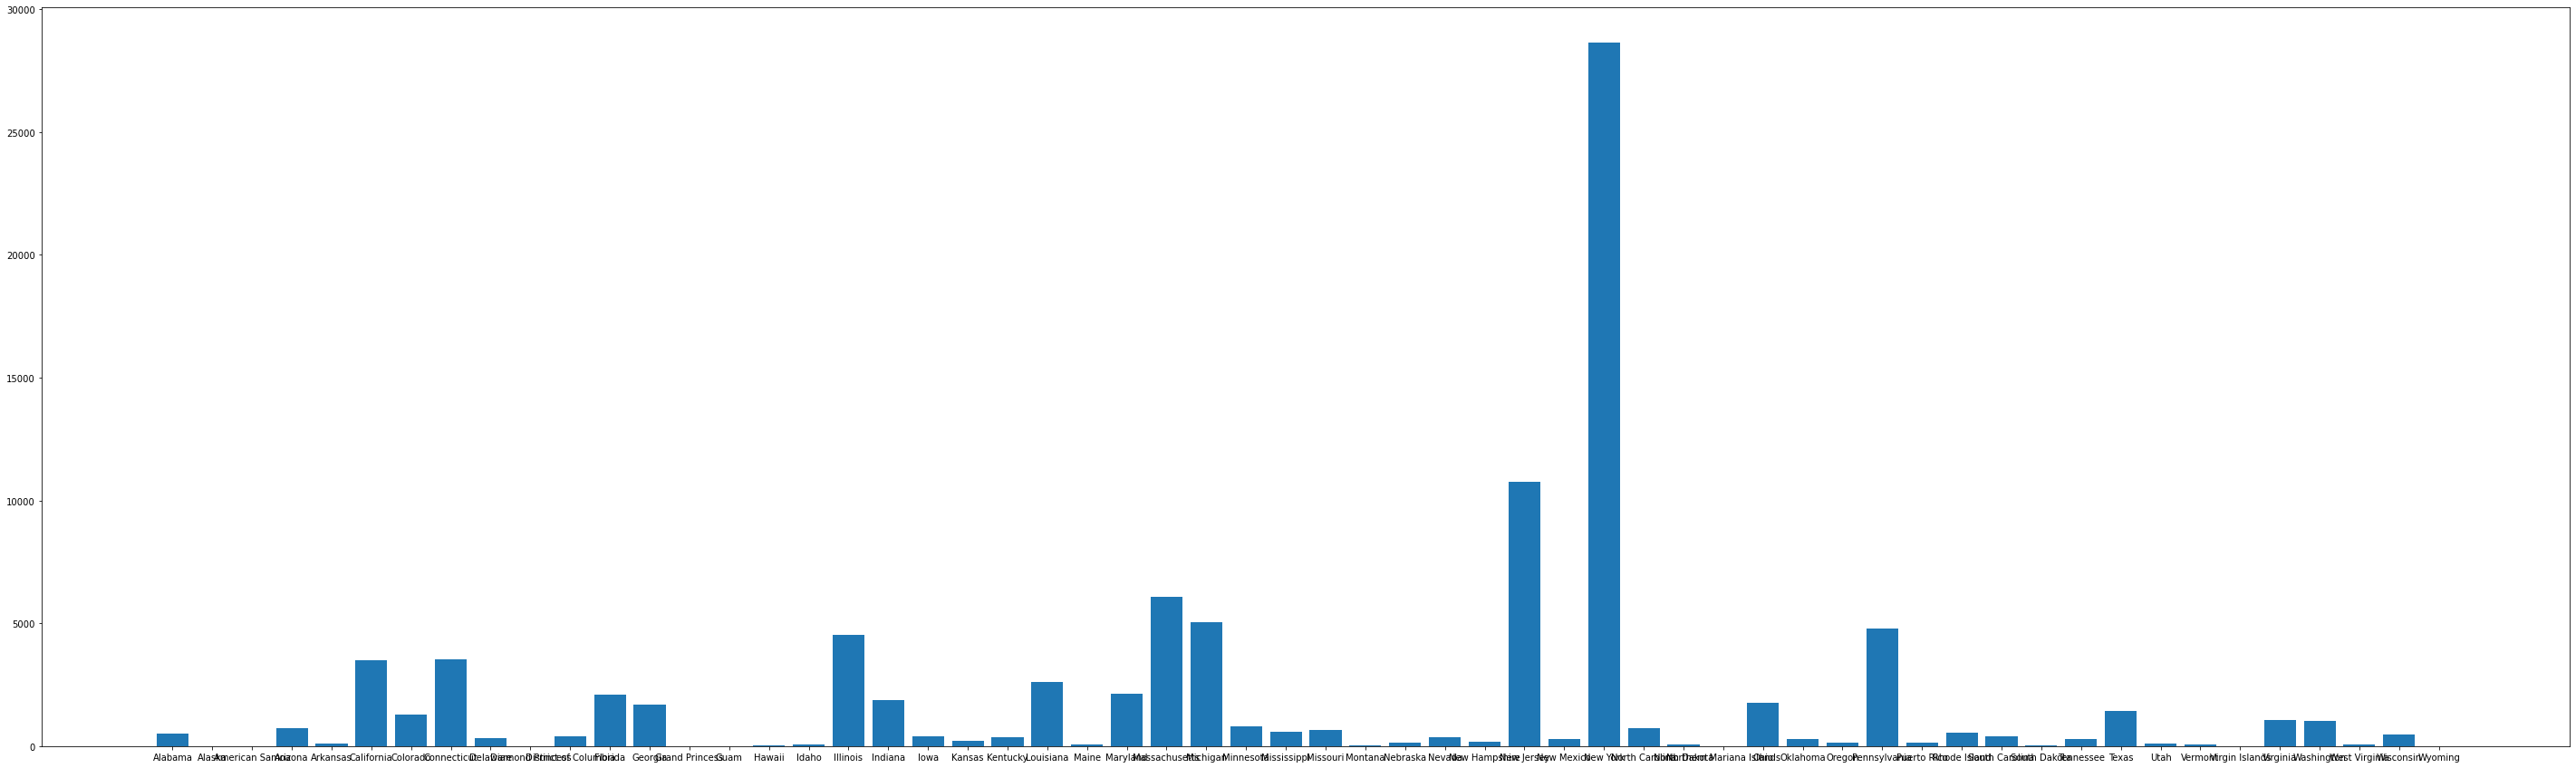

In [262]:
plt.figure(figsize=(50,15))
x=df["Province_State"]
y=df["Deaths"]
plt.bar(x,y)
xlabel="Region"
ylabel="Deaths"
plt.show()

Most number of death is in newyork.

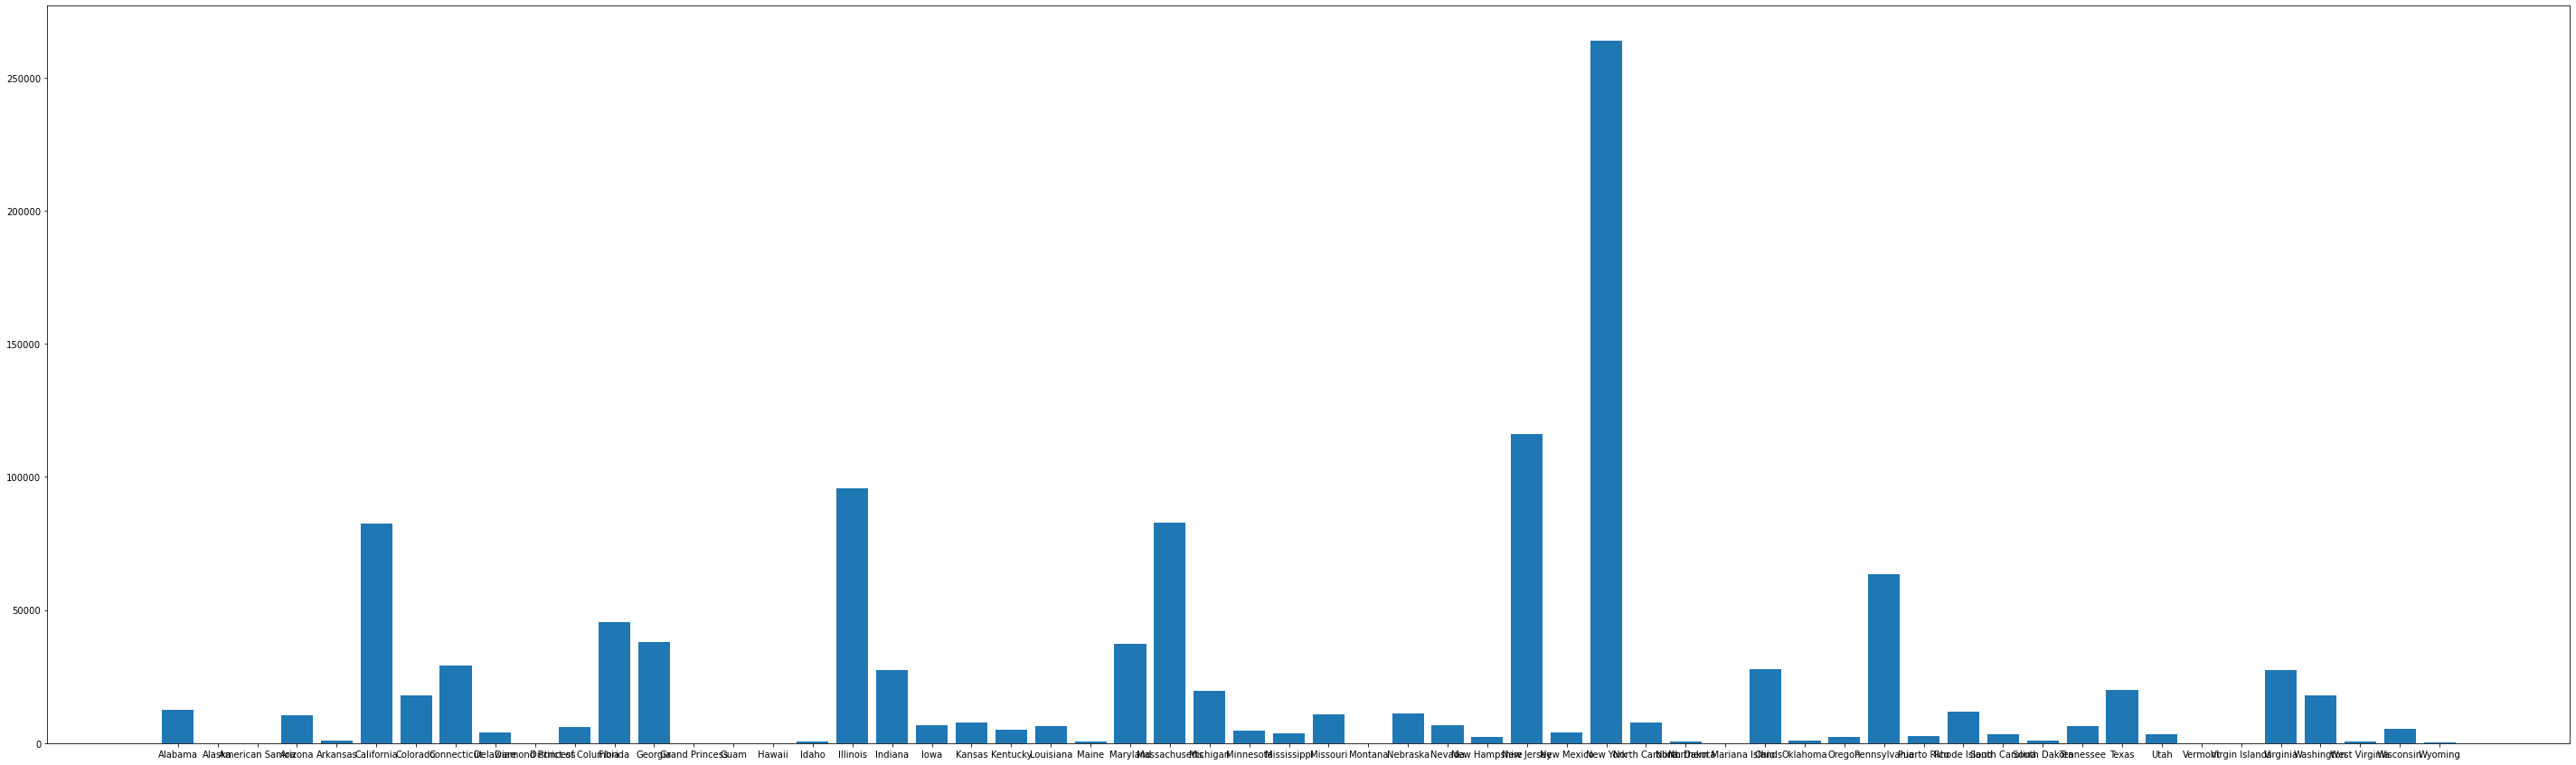

In [263]:
plt.figure(figsize=(50,15))
x=df["Province_State"]
y=df["Active"]
plt.bar(x,y)
xlabel='States'
ylabel='Confirmed'
plt.show()

Observation: Most active cases are in New york.

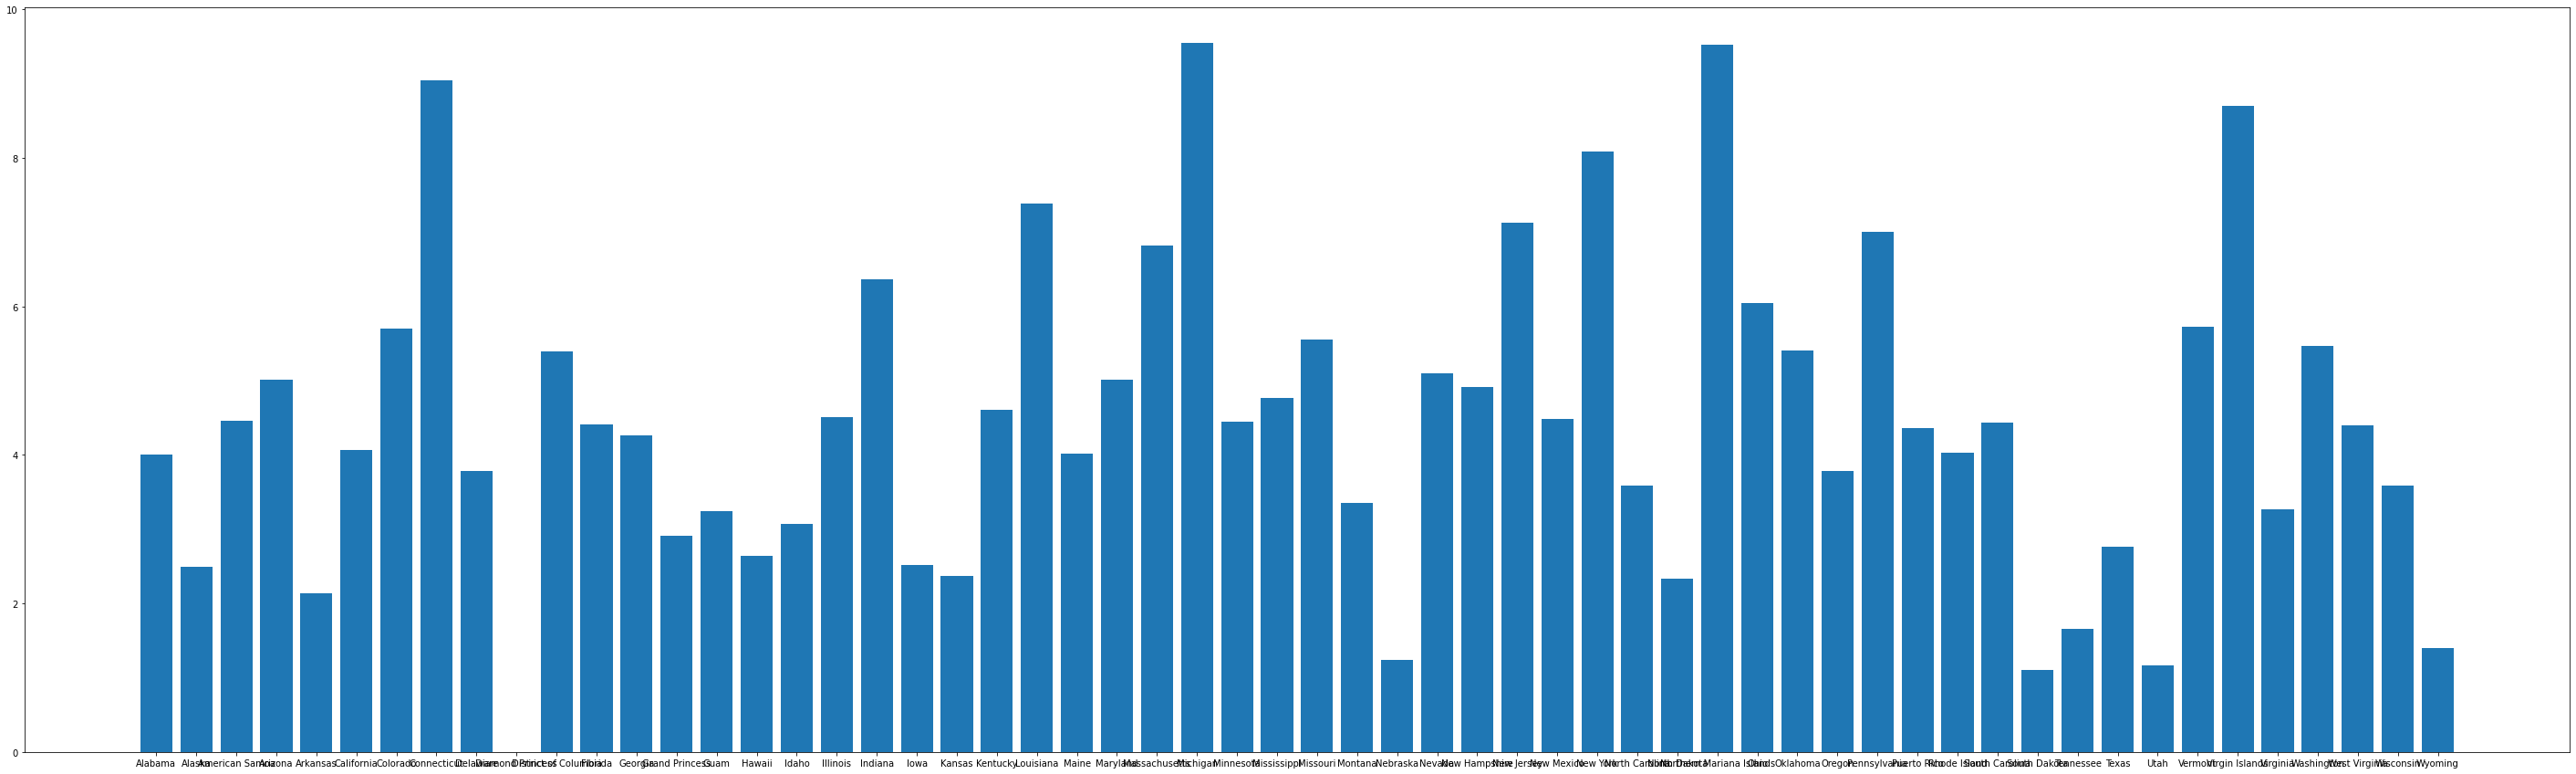

In [264]:
plt.figure(figsize=(50,15))
x=df["Province_State"]
y=df["Mortality_Rate"]
plt.bar(x,y)
xlabel='States'
ylabel='Mortality_Rate'
plt.show()

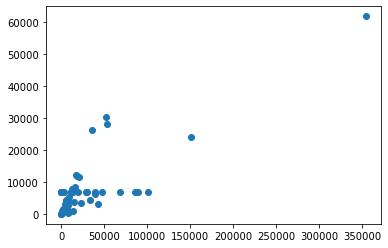

In [265]:
x=df["Confirmed"]
y=df["Recovered"]
plt.scatter(x,y)
xlabel="Confirmed"
ylabel="Recovered"
plt.show()

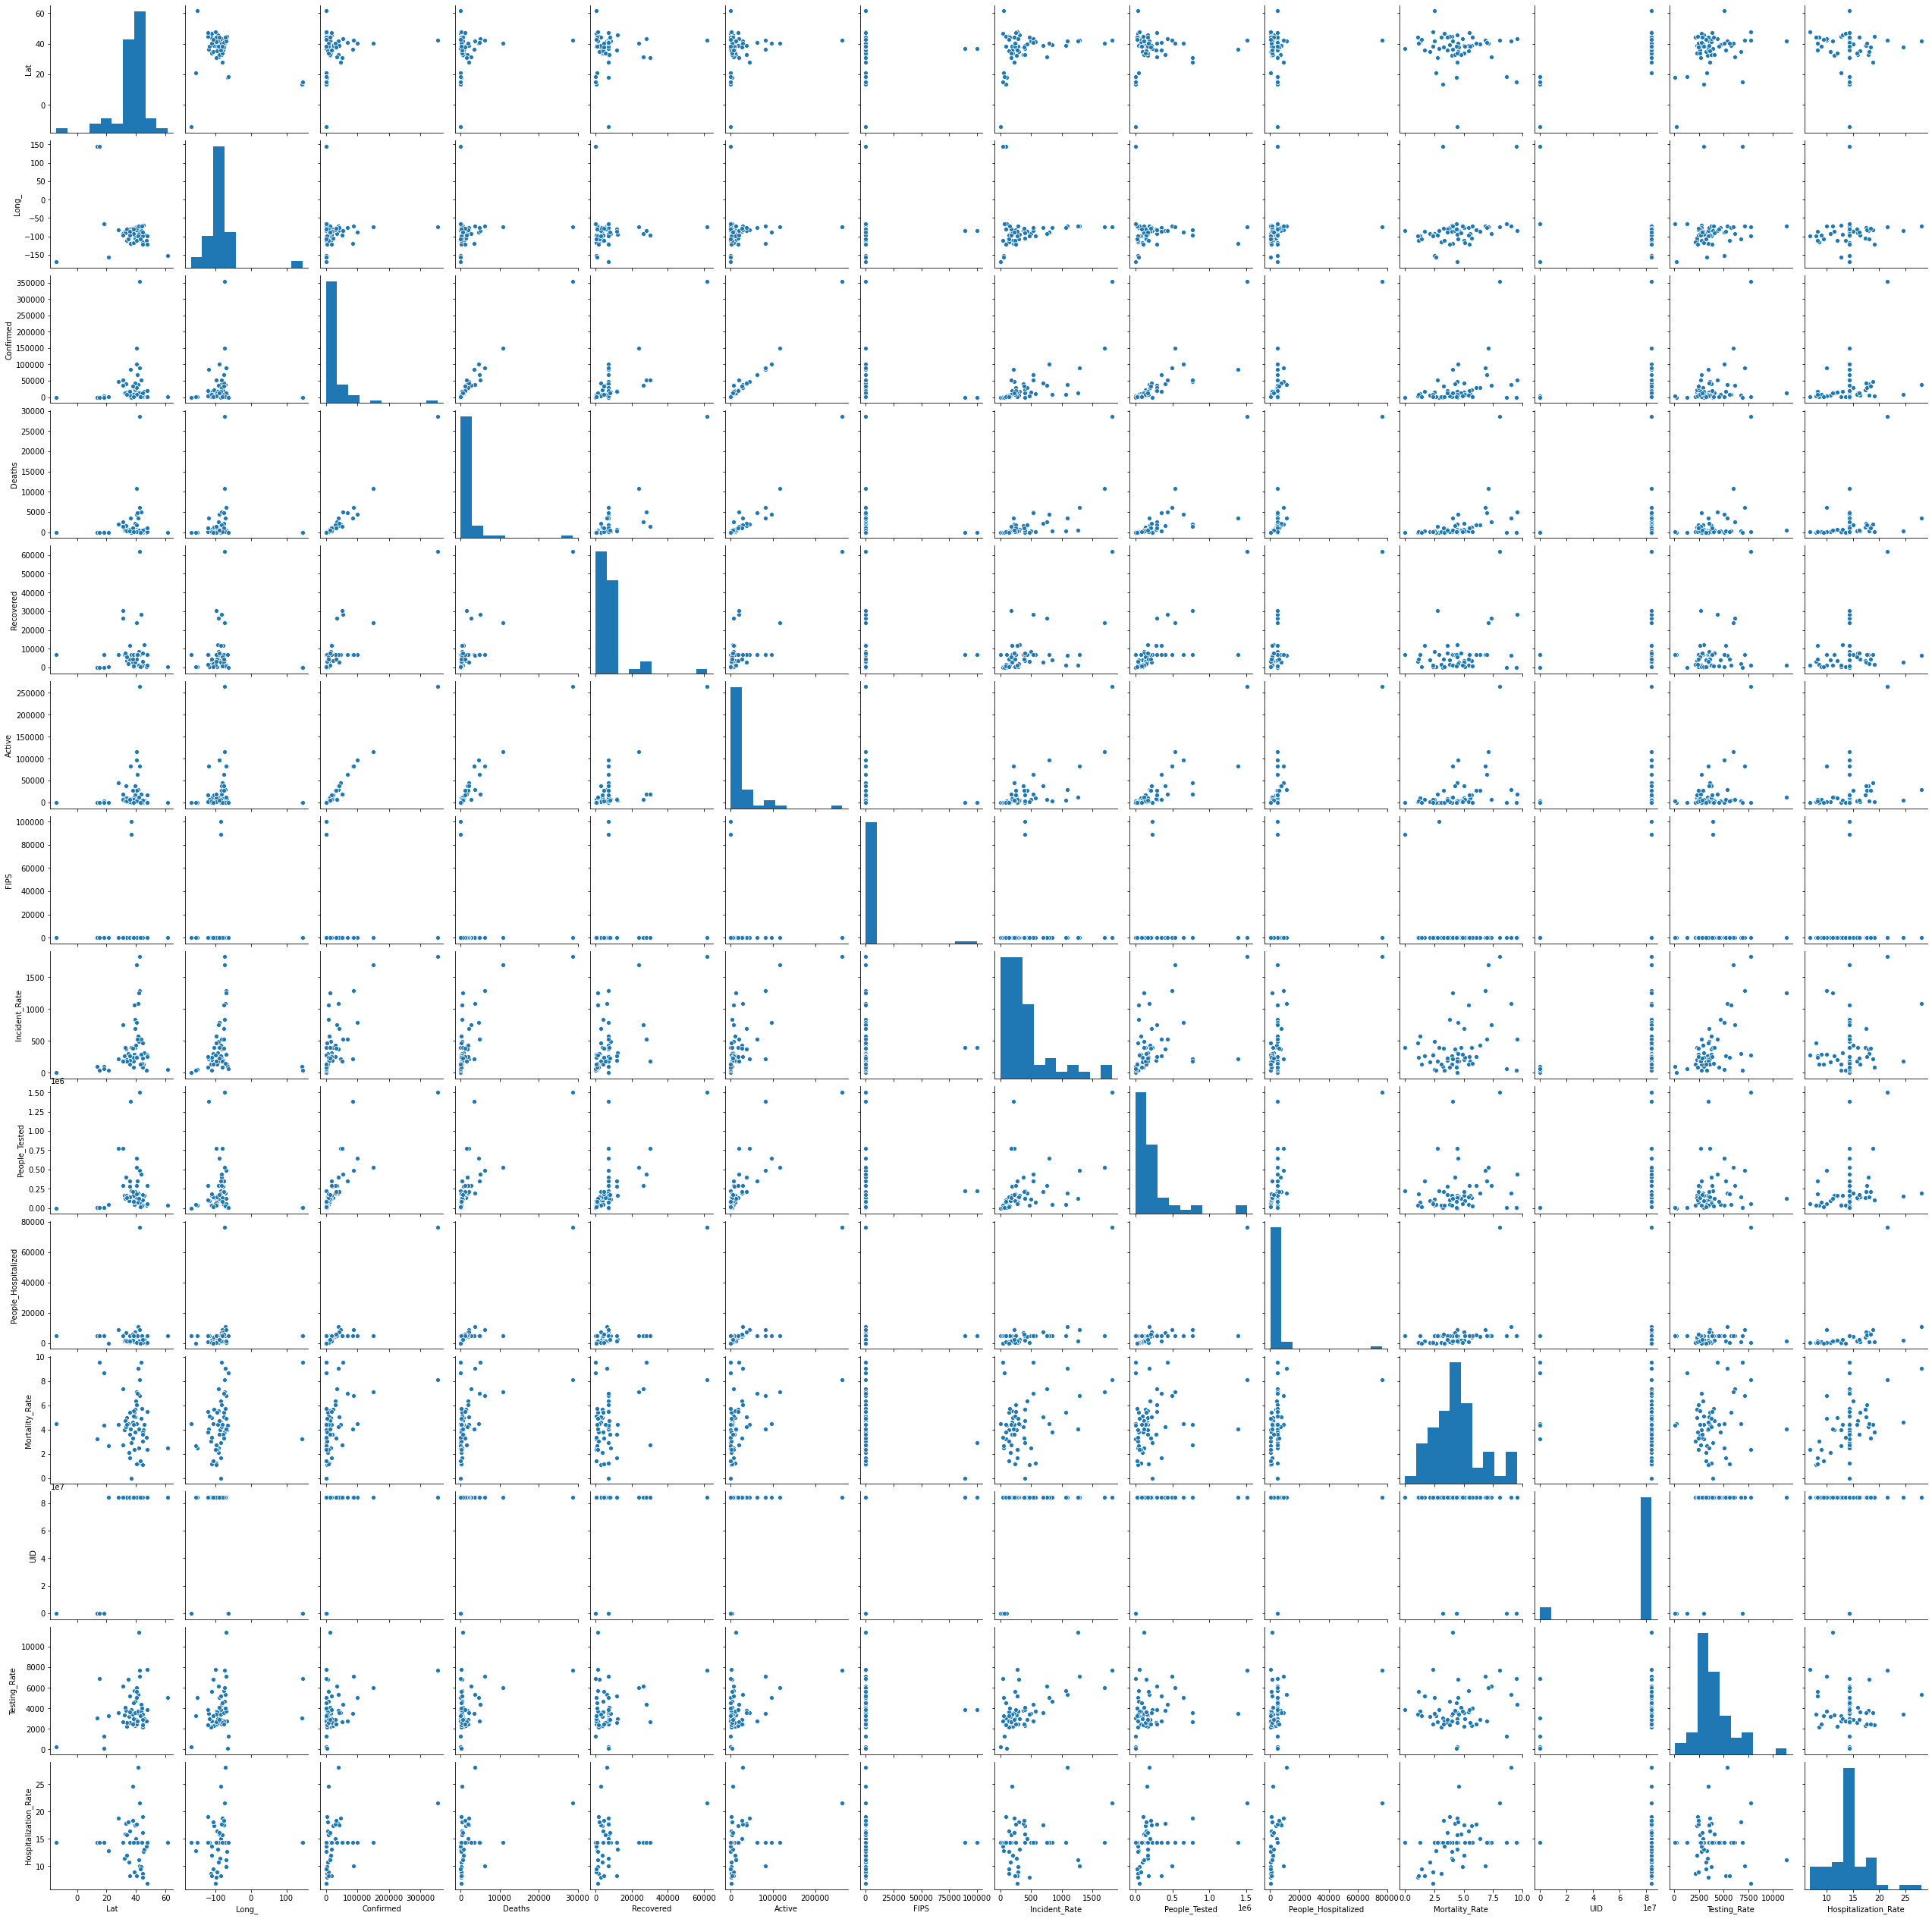

In [266]:
sns.pairplot(df)

In [ ]:
df.corr()

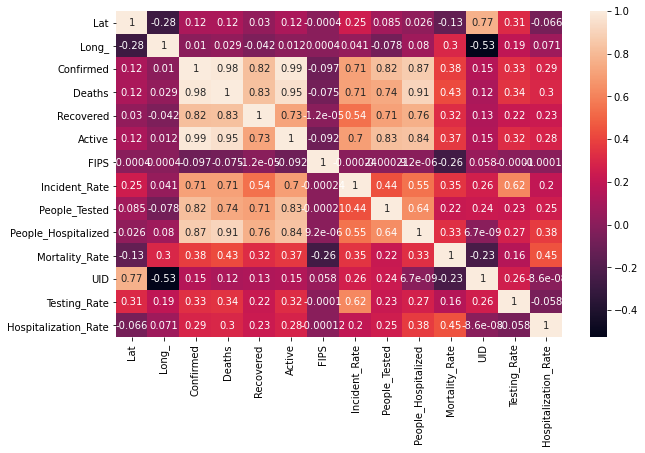

In [268]:
#checking in visuals
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

Observations:1)Confirmed cases, Recovered,Active and deaths are very highly correlated to each other.
             2)UID and Long_ shows they are negatively correlated.
             3)

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   58 non-null     float64
 4   Long_                 58 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             58 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         58 non-null     float64
 11  People_Tested         58 non-null     float64
 12  People_Hospitalized   58 non-null     float64
 13  Mortality_Rate        58 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

In [270]:
# province state , country region , last update , ISO3 are object and not important so lets drop this data

In [271]:
df.drop(['Province_State','Country_Region','Last_Update','ISO3'],axis=1, inplace=True)

Lat                        AxesSubplot(0.125,0.749828;0.133621x0.130172)
Long_                   AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Confirmed                AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Deaths                  AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Recovered               AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Active                     AxesSubplot(0.125,0.593621;0.133621x0.130172)
FIPS                    AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Incident_Rate            AxesSubplot(0.44569,0.593621;0.133621x0.130172)
People_Tested           AxesSubplot(0.606034,0.593621;0.133621x0.130172)
People_Hospitalized     AxesSubplot(0.766379,0.593621;0.133621x0.130172)
Mortality_Rate             AxesSubplot(0.125,0.437414;0.133621x0.130172)
UID                     AxesSubplot(0.285345,0.437414;0.133621x0.130172)
Testing_Rate             AxesSubplot(0.44569,0.437414;0.133621x0.130172)
Hospitalization_Rate    AxesSubplot(0.606034,0.4374

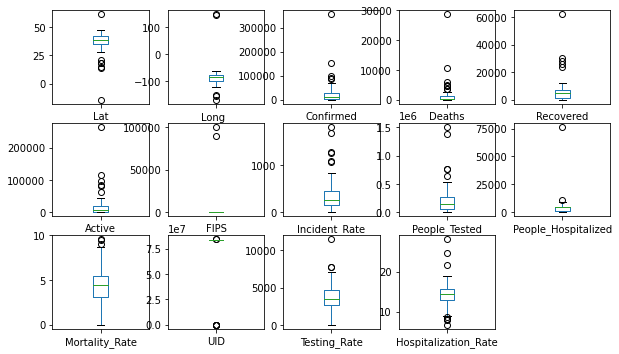

In [272]:
df.plot(kind='box',subplots=True,layout=(5,5),fontsize=10,figsize=(10,10))

Observation: As we can see there are outliers present in Lat,Long_ ,Confirmed, Deaths,Recovered,and other.

In [274]:
#Converting int aributes to float
col=['Lat', 'Long_','Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate','People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID','Testing_Rate', 'Hospitalization_Rate']
for i in col:
    df[i]=df[i].astype(float)

In [275]:
df.dtypes

Lat                     float64
Long_                   float64
Confirmed               float64
Deaths                  float64
Recovered               float64
Active                  float64
FIPS                    float64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                     float64
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

# Removing Outliers

In [290]:
from scipy.stats import zscore

In [291]:
#z=np.abs(zscore(df))

In [292]:
#z

In [293]:
#threshold=3

In [294]:
#print(np.where(z>3))

In [295]:
df.shape

(46, 14)

In [296]:
zs=zscore(df)
df=df[((zs<3) & (zs>-3)).all(axis=1)]

In [297]:
df.shape

(37, 14)

In [298]:
df.skew()

Lat                     0.015856
Long_                  -0.361518
Confirmed               1.980326
Deaths                  3.039718
Recovered               0.601202
Active                  2.220615
FIPS                   -0.224623
Incident_Rate           1.732247
People_Tested           0.931595
People_Hospitalized     0.252539
Mortality_Rate         -0.317565
UID                    -0.224623
Testing_Rate            1.625364
Hospitalization_Rate   -0.441337
dtype: float64

In [299]:
#Now Making Data ready for training and testing

In [304]:
from sklearn.model_selection import train_test_split

y = df['Hospitalization_Rate']
x = df.drop('Hospitalization_Rate',axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.22, random_state=22)

In [342]:
cross_val_score(LinearRegression(),x_train,y_train,cv=9).mean()

-2.33291950839487

In [351]:
lr=LinearRegression()
dtr=DecisionTreeRegressor()
gb=GaussianNB()
rf=RandomForestRegressor()
s=SVR()
kn=KNeighborsRegressor()


In [352]:
models = []
models.append(('Decision Tree',dtr))
models.append(('Linear regressor',lr))
models.append(('Random Forrest regressor',rf))
models.append(('Svr',s))
models.append(('KNeighbors',kn))


In [353]:
confusionmatrix=[]
r2score=[]
cr=[]
ae=[]
MSE=[]
for name, model in models:
    print(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    model.score(x_train,y_train)
    print("r2 score",r2_score(y_test,pre))
    r2score.append(r2_score(y_test,pre))
    
    print('Mean absolute error:', mean_absolute_error(y_test, pre))
    ae.append((mean_absolute_error(y_test, pre)))
    print('Mean squared error:', mean_squared_error(y_test, pre))
    MSE.append((mean_squared_error(y_test, pre)))
    print("\n")

Decision Tree
r2 score -1.8328256890901882
Mean absolute error: 3.4840673560533744
Mean squared error: 17.676770305858057


Linear regressor
r2 score 0.1665546606182563
Mean absolute error: 1.944294303577006
Mean squared error: 5.20068067847501


Random Forrest regressor
r2 score -0.1983962061345088
Mean absolute error: 2.281650365980889
Mean squared error: 7.477966100362137


Svr
r2 score -0.027874349540672583
Mean absolute error: 2.0183238453271795
Mean squared error: 6.413913446947447


KNeighbors
r2 score -0.5848232962240314
Mean absolute error: 2.5332002566999545
Mean squared error: 9.889262685881112




In [354]:
result=pd.DataFrame(y_test)

In [355]:
pre

array([12.40401813, 12.67732559, 13.46675922, 12.68130457, 16.39334825,
       12.67732559, 12.40401813, 10.59925209, 11.34836411])

In [356]:
result=pd.concat([result.reset_index().drop('index',axis=1),pd.DataFrame(pd.Series(pre))],axis=1)

In [357]:
result.columns=['Original','Predicted']

In [358]:
#Save model
joblib.dump(lr,'Covid 19 Recovered lr.obj')

['Covid 19 Recovered lr.obj']